In [3]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
#import lucem_illud #pip install -U git+git://github.com/Computational-Content-Analysis-2018/lucem_illud.git

#All these packages need to be installed from pip
import gensim#For word2vec, etc
import requests #For downloading our datasets
import nltk #For stop words and stemmers
import numpy as np #For arrays
import pandas as pd
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import sklearn.metrics.pairwise #For cosine similarity
import sklearn.manifold #For T-SNE
import sklearn.decomposition #For PCA

#gensim uses a couple of deprecated features
#we can't do anything about them so lets ignore them 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os #For looking through files
import os.path #For managing file paths

In [230]:
rows = []
c=0
with open('./dpcq.txt','rb') as f:
    for r in f:
        if len(r)>5:
            rows.append(r.decode('utf-8'))
        c+=1
        if c>100000:
            break
len(rows)

50002

In [231]:
bookW2V = pd.DataFrame(rows,columns=['paragraph'])

In [232]:
bookW2V.head(2)

,paragraph
0,《斗破苍穹》天蚕土豆\r\n
1,严正声明：本书为丫丫小说网(www.shuyaya.com)的用户上传至其在本站的存储空间，...


In [233]:
import jieba
from collections import defaultdict

In [234]:
stopwords ={}
f = open('./chinese.stop', 'rb')
for r in f:
    stopwords[r.strip().decode('utf-8')]=1

In [235]:
w_dic = defaultdict(int)

In [236]:
tokenized = []
for i in range(len(bookW2V)):
    temp= []
    for r in jieba.cut(bookW2V['paragraph'][i]):
        w_dic[r]+=1
        temp.append(r)
    tokenized.append(temp)

In [237]:
len(tokenized)

50002

In [240]:
np.percentile(np.array(list(w_dic.values())),80)

10.0

In [268]:
new_tokenized = []
for tk in tokenized:
    temp = []
    for t in tk:
        if w_dic[t]>=10 and not t in stopwords and not t in ['\n','\r\n',' '] and len(t)>0:
            temp.append(t)
    if len(temp)>1:
        new_tokenized.append([temp])

In [269]:
len(new_tokenized)

48179

In [270]:
bookW2V = pd.DataFrame(new_tokenized,columns=["30_ch_list_replace"])

In [271]:
bookW2V.head(20)

,30_ch_list_replace
0,"[斗破, 苍穹, 土豆]"
1,"[本书, 上传, 提供, 电子书, 免费, 下载, 关系]"
2,"[阅读, 18]"
3,"[陨落, 天才]"
4,"[测验, 魔, 石碑, 刺眼, 五个, 大字, 少年, 面, 无表情, 唇角, 一抹, 自嘲..."
5,"[萧炎, 三段, 级别, 低级, 测验, 魔, 石碑, 旁, 一位, 中年男子, 一眼, 显..."
6,"[中年男子, 话, 刚刚, 脱口, 便是, 不出意外, 人头, 汹涌, 广场, 上带, 一阵..."
7,"[三段, 不出, 所料, 天才, 一年]"
8,"[废物, 家族, 脸]"
9,"[族长, 父亲, 废物, 早就, 驱赶, 出, 家族, 机会, 家族, 中]"


In [280]:
bookW2V2 = pd.DataFrame(sorted(bookW2V.values),columns=bookW2V.columns)

In [298]:
bookW2V2.head(20)

,30_ch_list_replace
0,"[!, !, !]"
1,"[!, 一名, 大汉, 恭声, 应道, 飞快, 转身, 坊, 市, 内部, 跑]"
2,"[!, 一脚, !]"
3,"[!, 云岚宗, 追杀, 出, 加玛, 帝国, 没想到, 这才, 短短, 三年, 时间, 强..."
4,"[!, 厅, 之中, 一名, 青衣, 老者, 脸色, 一沉, 道, 家族, 情况, 家族, ..."
5,"[!, 听, 响起, 耳, 刺耳, 声音, |, 脸色, 惨白, 炎利, 抬头, 道]"
6,"[!, 噗, 两道, 锁链, 暴射, 出, 众多, 毒宗, 强者, 惊骇, 急忙, 闪避, ..."
7,"[!, 地魔, 老鬼, 冲着, 小医仙, 冷笑, 道]"
8,"[!, 多谢, 说, 份, 萧炎, 自然, 不好, 迟疑, 点, 点头, 医仙, 拱手, 笑..."
9,"[!, 应, 喝, 旋即, 起身, 缓缓, 退出, 房间]"


In [299]:
bookW2V_model2 = gensim.models.word2vec.Word2Vec(bookW2V2['30_ch_list_replace'],hs=0,alpha=0.05,iter=5,size=100)

In [300]:
bookW2V_model = gensim.models.word2vec.Word2Vec(bookW2V['30_ch_list_replace'],hs=0,alpha=0.05,iter=5,size=100)

In [301]:
len(bookW2V_model.wv.syn0),len(bookW2V_model2.wv.syn0)

(9724, 9724)

In [305]:
ind=29
bookW2V_model.wv.index2word[ind],bookW2V_model2.wv.index2word[ind]

('脸庞', '脸庞')

In [306]:
bookW2V_model2.most_similar('脸庞', topn= 15)

[('面庞', 0.7906191349029541),
 ('脸上', 0.7020155191421509),
 ('面色', 0.6648739576339722),
 ('俏脸', 0.6605743169784546),
 ('脸颊', 0.6591252088546753),
 ('面孔', 0.6519913673400879),
 ('嘴角', 0.624454915523529),
 ('小脸', 0.6230961084365845),
 ('脸色', 0.6168925762176514),
 ('一脸', 0.6124627590179443),
 ('脸', 0.5763064026832581),
 ('面容', 0.5725414752960205),
 ('老脸', 0.5719617605209351),
 ('满脸', 0.5552536249160767),
 ('面露', 0.5443519353866577)]

In [307]:
bookW2V_model.most_similar('脸庞', topn= 15)

[('面庞', 0.7890247106552124),
 ('俏脸', 0.7154985666275024),
 ('脸颊', 0.7108414769172668),
 ('面色', 0.6849466562271118),
 ('脸上', 0.6796271204948425),
 ('嘴角', 0.6442400813102722),
 ('面孔', 0.6413440108299255),
 ('小脸', 0.6400207281112671),
 ('脸色', 0.6189929246902466),
 ('眼神', 0.5917035937309265),
 ('脸', 0.5907431840896606),
 ('一脸', 0.5898550152778625),
 ('老脸', 0.5847097635269165),
 ('面容', 0.5536115765571594),
 ('面目', 0.543169379234314)]

Done epoch 1
Done epoch 2
Done epoch 3
Done epoch 4
Done epoch 5
Done epoch 6
Done epoch 7
Done epoch 8
Done epoch 9
Done epoch 10
Done epoch 11
Done epoch 12
Done epoch 13
Done epoch 14
Done epoch 15
Done epoch 16
Done epoch 17
Done epoch 18
Done epoch 19
Done epoch 20


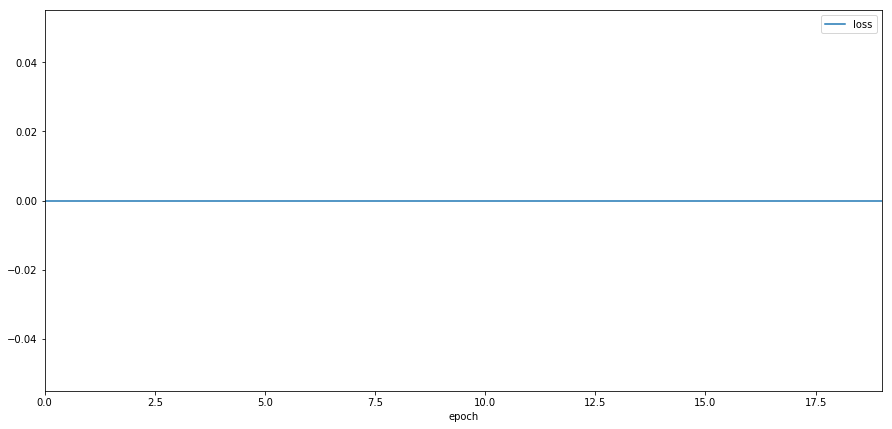

In [309]:
losses=[]
bookW2V_loss = gensim.models.word2vec.Word2Vec(size = 50, #dimensions
                                               alpha=0.5,
                                               window=5,
                                               min_count=5,
                                               hs=0,  #hierarchical softmax toggle
                                               compute_loss = True)
# bookW2V_loss.build_vocab(bookDF_ch["30_ch_list_replace"].sum())
bookW2V_loss.build_vocab(bookW2V["30_ch_list_replace"])
for i in range(20):
    bookW2V_loss.train(bookW2V["30_ch_list_replace"], 
                       total_examples=bookW2V_loss.corpus_count, 
                       epochs=1)
    losses.append(bookW2V_loss.get_latest_training_loss())#running_training_loss
    print("Done epoch {}".format(i + 1))

lossesDF = pd.DataFrame({'loss' : losses, 'epoch' : range(len(losses))})
lossesDF.plot(y = 'loss', x = 'epoch',logy=False, figsize=(15, 7))
plt.show()